In [2]:
import os
import glob as glob
import matplotlib.pyplot as plt
import cv2
import requests
import random
import numpy as np

def set_res_dir():
    # Directory to store results
    res_dir_count = len(glob.glob('runs/train/*'))
    print(f"Current number of result directories: {res_dir_count}")
    RES_DIR = f"results_{res_dir_count+1}"
    print(RES_DIR)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive

In [3]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -U -r yolov5/requirements.txt  # install dependencies
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 15973, done.
remote: Counting objects: 100% (142/142), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 15973 (delta 84), reused 97 (delta 60), pack-reused 15831
Receiving objects: 100% (15973/15973), 14.63 MiB | 14.45 MiB/s, done.
Resolving deltas: 100% (10957/10957), done.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 87.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 112.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.6/599.6 kB 43.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 77.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 69.2 MB/s 

/content/drive/MyDrive/yolov5


In [17]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="your key")
project = rf.workspace("newtoms-he4yz").project("weapon-detection-f10u0")
dataset = project.version(2).download("yolov5")


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Weapon-Detection-2 in yolov5pytorch:: 100%|██████████| 14669/14669 [01:44<00:00, 139.83it/s]


In [11]:
RES_DIR = set_res_dir()
!python train.py --data /content/drive/MyDrive/yolov5/mgd_yolov5-3/data.yaml --weights yolov5s.pt \
    --img 640 --epochs 50 --batch-size 32 --name {RES_DIR}

Current number of result directories: 12
results_13
train: weights=yolov5s.pt, cfg=, data=/content/drive/MyDrive/yolov5/mgd_yolov5-3/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=None, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-181-g3812a1a Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, o

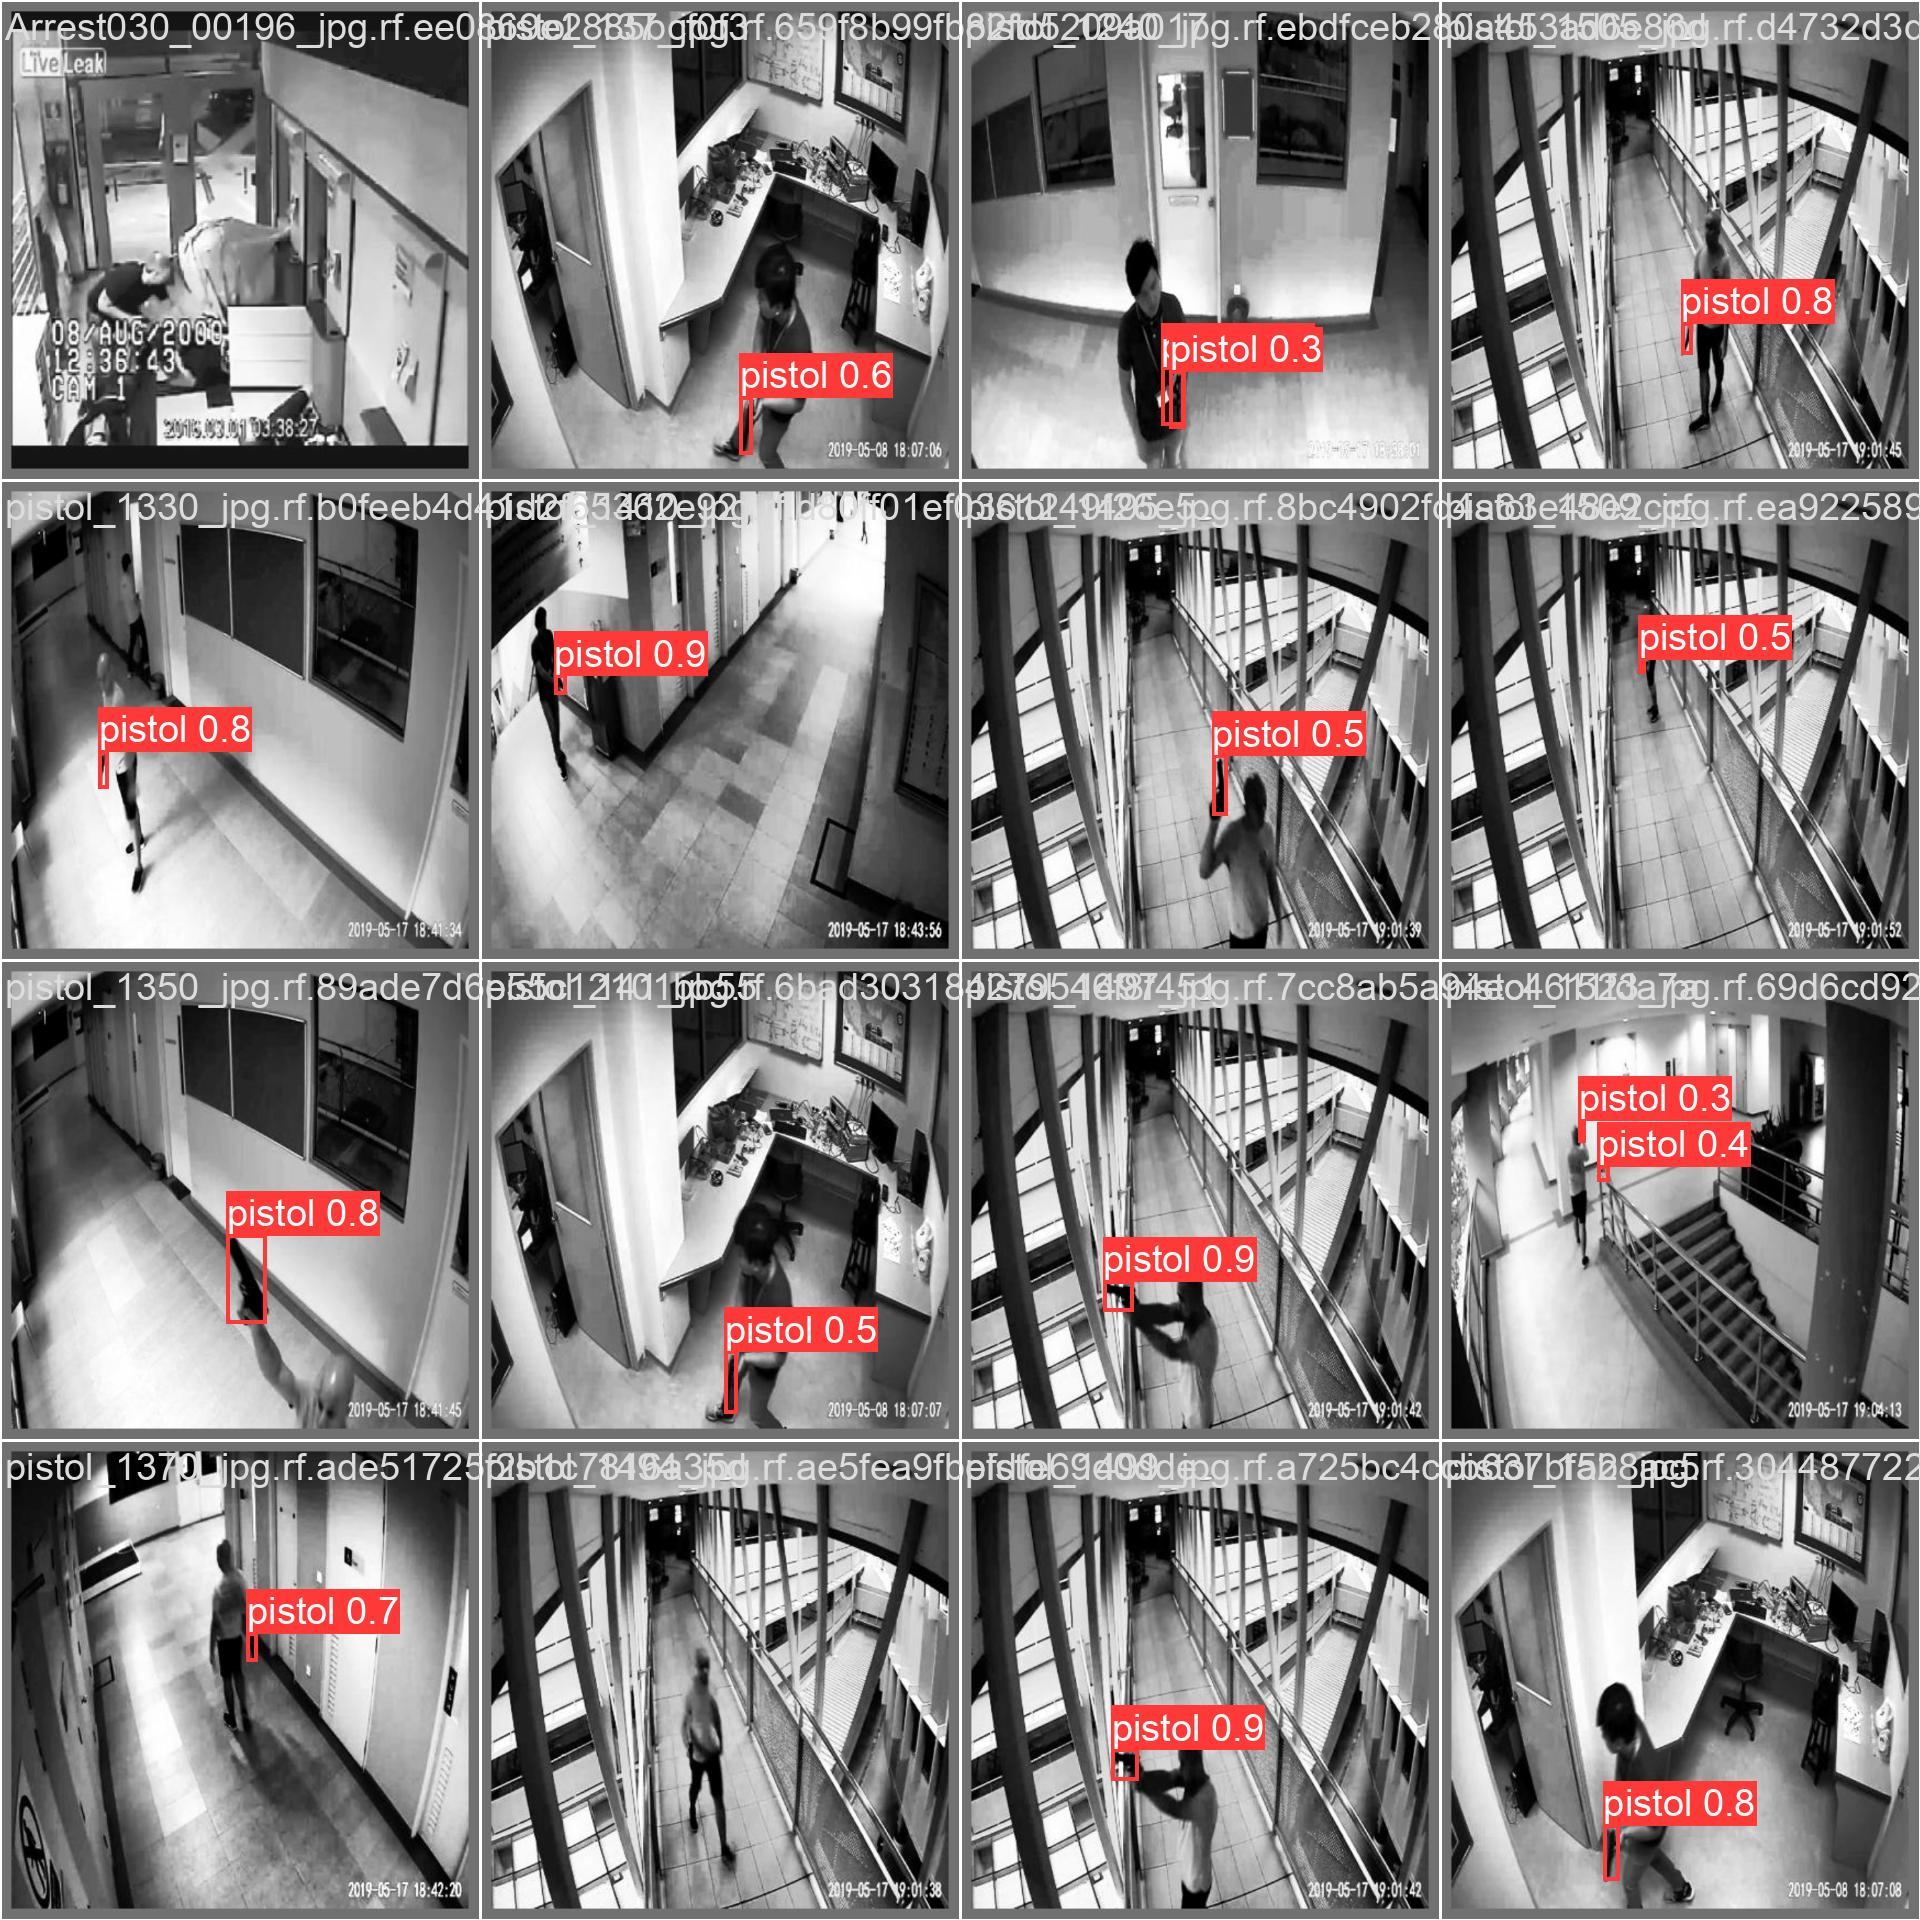

In [15]:
from IPython.display import Image
Image('/content/drive/MyDrive/yolov5/runs/train/None/val_batch0_pred.jpg')

In [13]:
#avaliar resultados em imagens importadas
!python detect.py --weights /content/drive/MyDrive/yolov5/runs/train/None/weights/best.pt --img 640 \
    --conf 0.4 --source /content/master1_100341545_main.jpg


detect: weights=['/content/drive/MyDrive/yolov5/runs/train/None13/weights/best.pt'], source=/content/master1_100341545_main.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-181-g3812a1a Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/1 /content/master1_100341545_main.jpg: 512x640 1 pistol, 75.1ms
Speed: 0.8ms pre-process, 75.1ms inference, 1.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp4


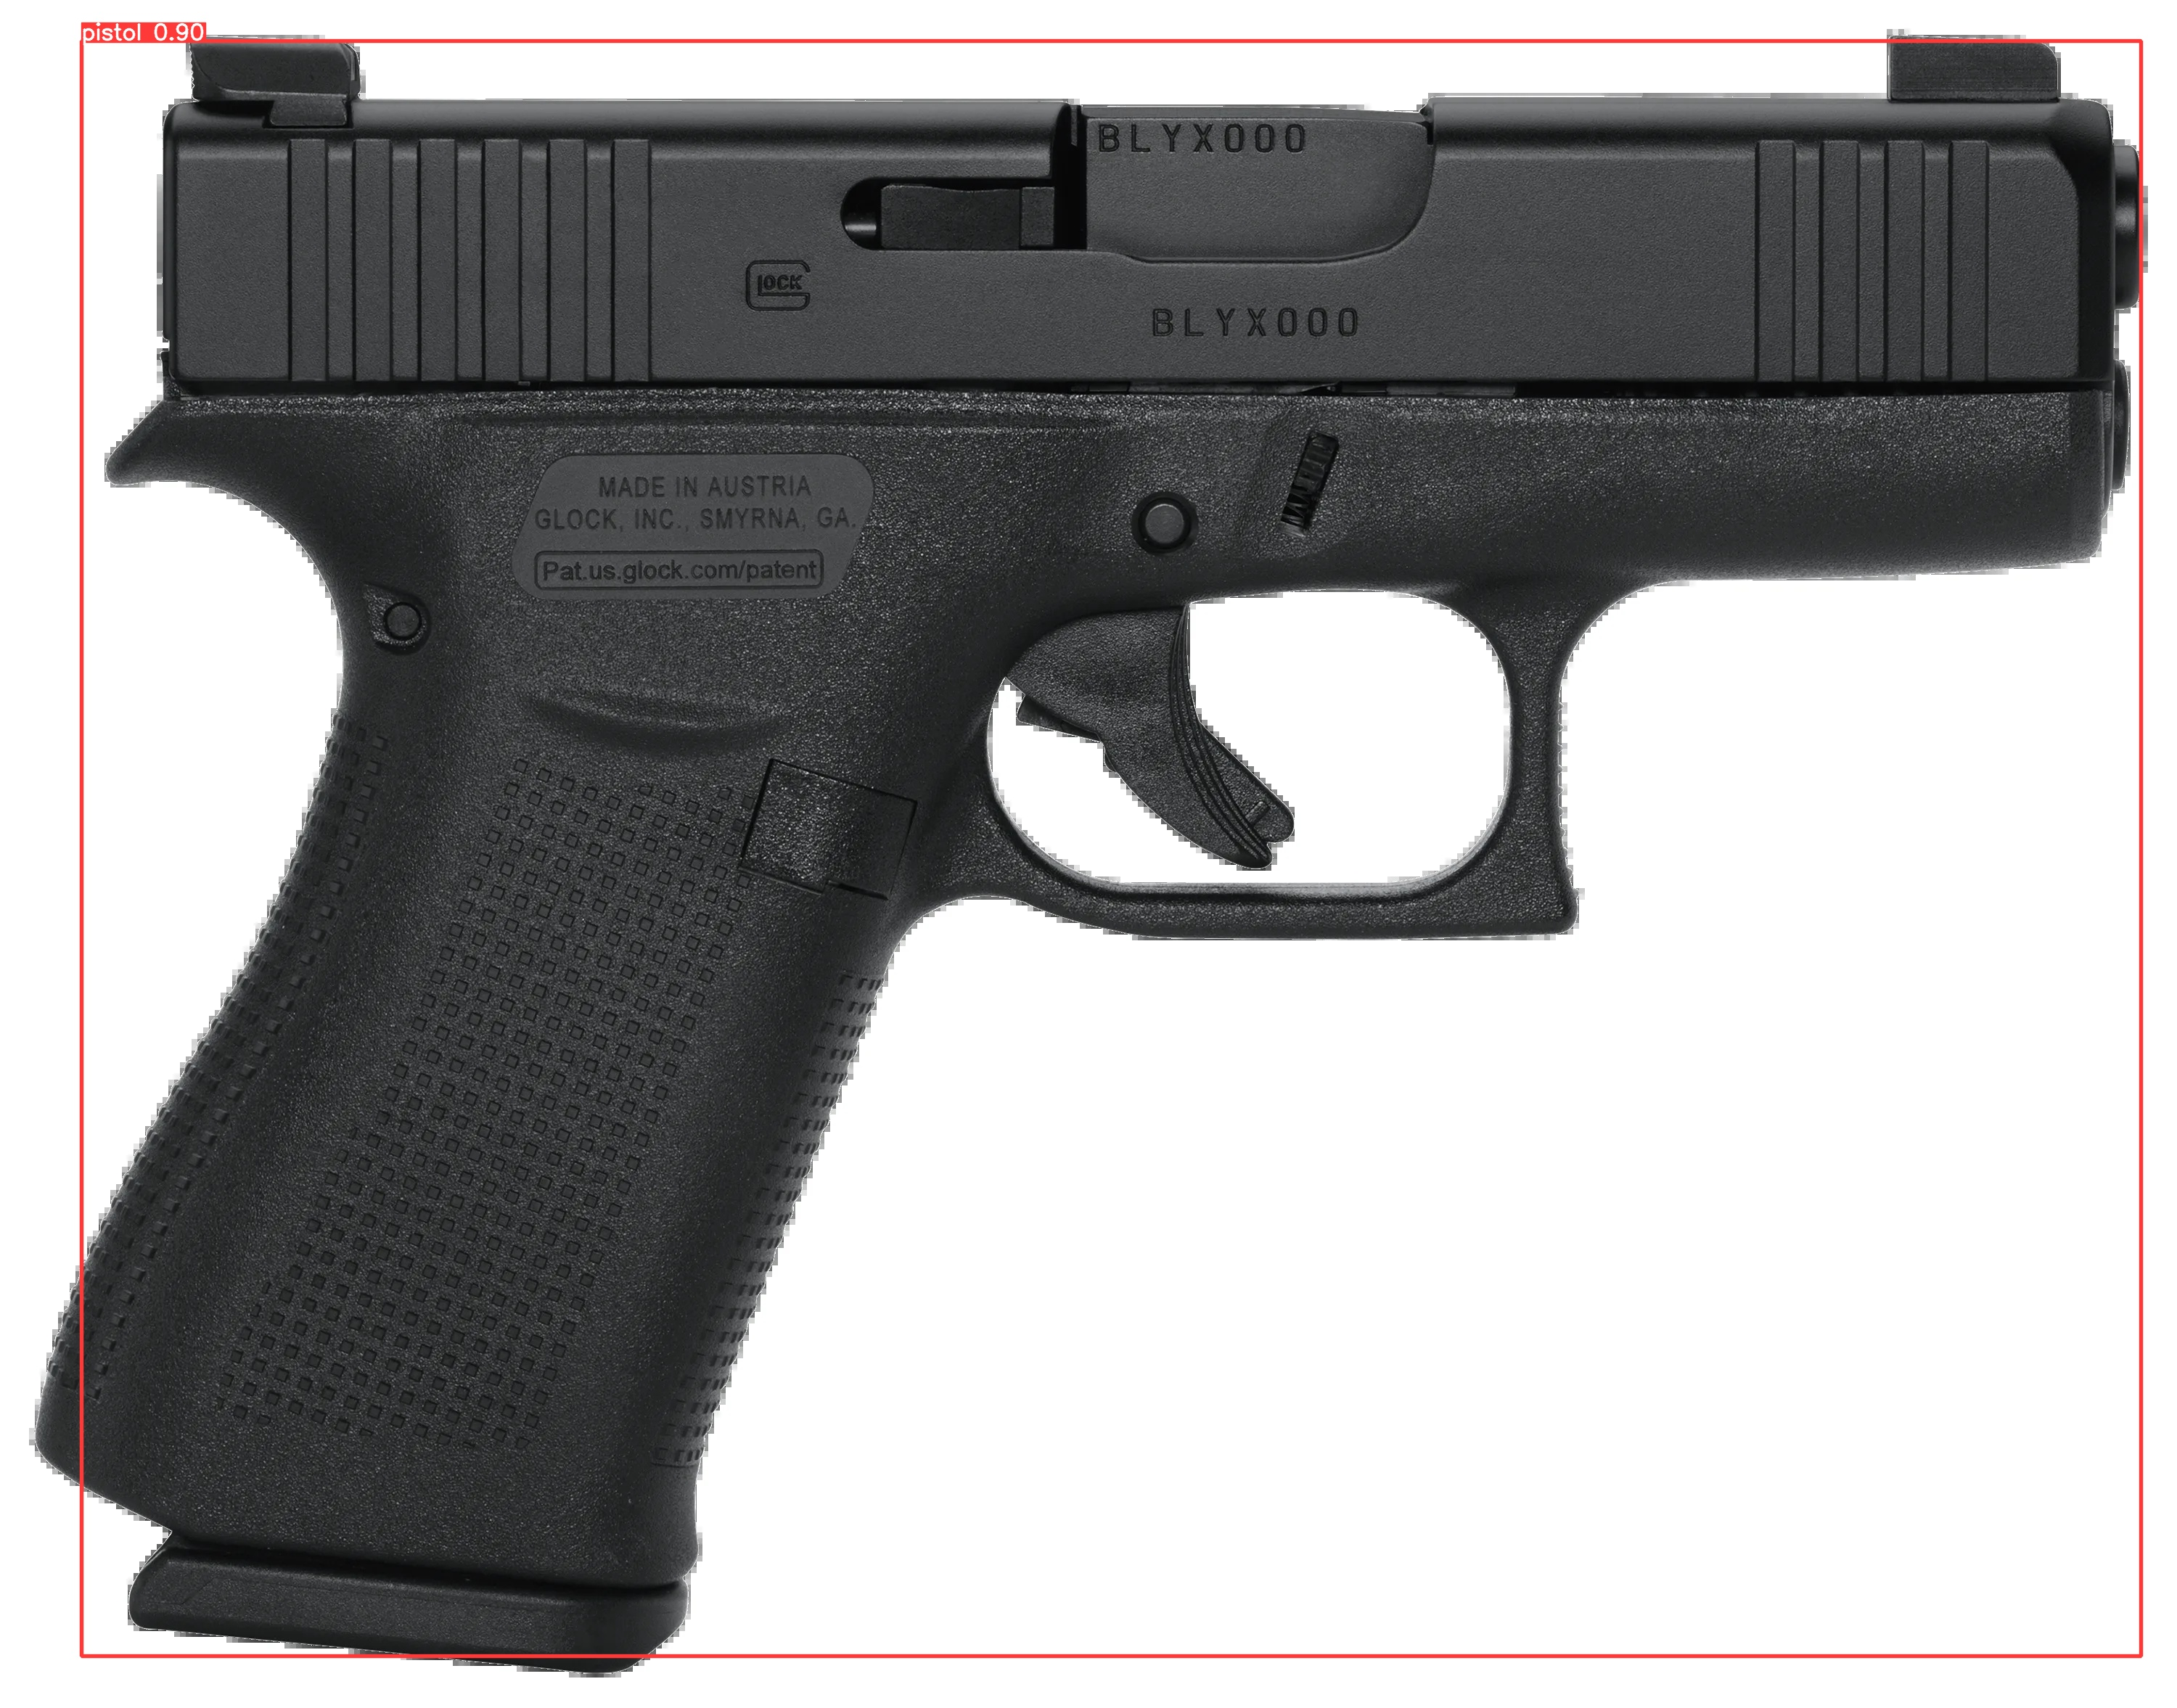

In [16]:
Image('/content/drive/MyDrive/yolov5/runs/detect/exp/master1_100341545_main.jpg')